<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/evaluasiperforma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Diagnosis kanker payudara

id = ID number

diagnosis= golongan kanker apakah Malignant (ganas) atau Benign (jinak)

### Karakteristik dari inti sel:

*   radius = jarak dari titik pusat ke titik perimeter
*   texture = standard deviation dari intensitas skala keabuan pada komponen-komponen piksel citra
*   perimeter = garis keliling inti sel
*   area = luas inti sel
*   smoothness = perbedaan antara panjang jari-jari dan rata-rata garis di sekitarnya
*   compactness = kepadatan inti sel -> perimeter^2 / area - 1.0
*   concavity = kecengkungan kurva pada batas inti sel
*   concave points = titik kecengkungan kurva pada batas inti sel
*   symmetry = selisih garis tegak lurus sumbu utama menuju batas inti sel di kedua arah
*   fractal dimension = ukuran numerik/dimensi fraktal dari sel -> "coastline approximation" - 1


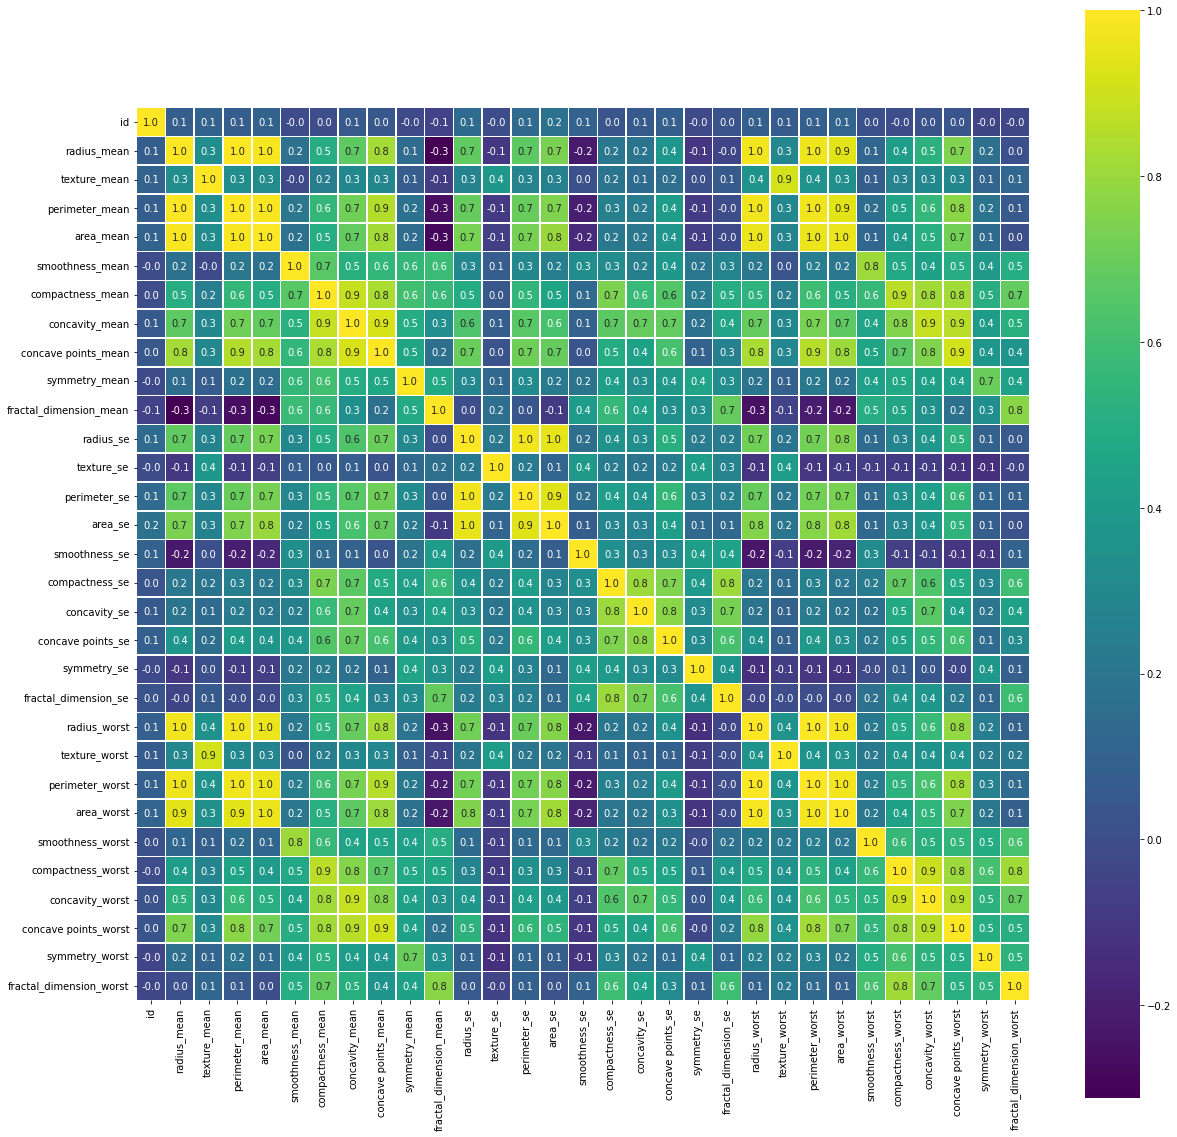

In [ ]:
import seaborn as sns
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="viridis", linewidths=.5, ax=ax);

In [ ]:
df.drop(['id'], axis = 1, inplace=True)

In [ ]:
B, M = df['diagnosis'].value_counts()
print('Frekuensi stadium kanker : ')
print('Banyaknya kanker ganas (Malignant) : ', M)
print('Banyaknya kanker jinak (Benign)    : ', B)

Frekuensi stadium kanker : 
Banyaknya kanker ganas (Malignant) :  212
Banyaknya kanker jinak (Benign)    :  357


## Split data training dan data test

Data terbagi menjadi 30% data test dan 70% data training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50, 
                                                    stratify=y)

In [ ]:
print(f"Train features: {x_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Test features: {x_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (398, 31)
Train target: (398,)
Test features: (171, 31)
Test target: (171,)


## Neural Network

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
print(x_test)

[[9.68932883e-04 2.66561914e-01 2.13391951e-01 ... 3.68329264e-01
  3.38611449e-01 3.44935903e-01]
 [1.00313632e-03 1.30214405e-01 2.32330064e-01 ... 2.90652250e-01
  1.98741372e-01 3.36021734e-01]
 [9.83218882e-04 2.67068782e-01 2.90158945e-01 ... 2.30484827e-01
  3.03491677e-01 1.46531964e-01]
 ...
 [8.84724605e-05 1.91038573e-01 2.85762597e-01 ... 1.92152075e-01
  1.00690215e-01 1.79726632e-01]
 [9.55065073e-03 3.68949263e-01 3.39871491e-01 ... 2.00697593e-01
  1.89606171e-01 4.78818236e-02]
 [9.76839178e-03 3.34482234e-01 2.40446398e-01 ... 1.16253924e-01
  1.51441332e-01 5.08532133e-02]]


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=5, learning_rate_init = 0.1, max_iter=100)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=100)

In [ ]:
nn_pred = clf.predict(x_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(nn_pred,y_test))

Accuracy: 0.935672514619883


In [189]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Naural Network'] = nn_pred.flatten()
hasil_prediksi['Naural Network'] = hasil_prediksi['Naural Network']
hasil_prediksi.head(10)

,Aktual,Naural Network
0,B,B
1,B,B
2,B,B
3,M,B
4,B,B
5,M,B
6,M,M
7,M,M
8,B,B
9,B,B


In [193]:
print(classification_report(y_test, nn_pred))

ConfMatrix = confusion_matrix(y_test,nn_pred)

              precision    recall  f1-score   support

           B       0.91      0.99      0.95       107
           M       0.98      0.84      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



## Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(x_train, y_train)
dt_pred = dtc.predict(x_test)

In [184]:
print('Accuracy:', metrics.accuracy_score(dt_pred,y_test))

Accuracy: 0.935672514619883


In [190]:
hasil_prediksi['DecisionTree'] = dt_pred.flatten()
hasil_prediksi['DecisionTree'] = hasil_prediksi['DecisionTree']
hasil_prediksi.head(10)

,Aktual,Naural Network,DecisionTree
0,B,B,B
1,B,B,B
2,B,B,B
3,M,B,B
4,B,B,B
5,M,B,B
6,M,M,M
7,M,M,M
8,B,B,B
9,B,B,B


In [192]:
print(classification_report(y_test, dt_pred))
ConfMatrix = confusion_matrix(y_test,dt_pred)

              precision    recall  f1-score   support

           B       0.91      0.99      0.95       107
           M       0.98      0.84      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



## Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [196]:
rf_pred = rf_clf.predict(x_test)
print('Accuracy:', metrics.accuracy_score(rf_pred,y_test))

Accuracy: 0.9415204678362573


In [197]:
hasil_prediksi['Random Forest'] = rf_pred.flatten()
hasil_prediksi['Random Forest'] = hasil_prediksi['Random Forest']
hasil_prediksi.head(10)

,Aktual,Naural Network,DecisionTree,Random Forest
0,B,B,B,B
1,B,B,B,B
2,B,B,B,B
3,M,B,B,B
4,B,B,B,B
5,M,B,B,B
6,M,M,M,M
7,M,M,M,M
8,B,B,B,B
9,B,B,B,B


In [198]:
print(classification_report(y_test, rf_pred))

ConfMatrix = confusion_matrix(y_test,rf_pred)

              precision    recall  f1-score   support

           B       0.92      0.99      0.95       107
           M       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## K-Nearest Neighbors

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [202]:
# tuning nilai k

param_grid = {'n_neighbors' : np.arange(1,201)}

knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3, scoring= 'accuracy')
knn_clf.fit(x_train, y_train)
knn_clf.best_params_

{'n_neighbors': 7}

In [203]:
knn_clf = KNeighborsClassifier(n_neighbors = 7)
knn_clf.fit(x_train, y_train)

knn_pred = knn_clf.predict(x_test)

In [204]:
print('Accuracy:', metrics.accuracy_score(knn_pred,y_test))

Accuracy: 0.9590643274853801


In [205]:
hasil_prediksi['K-Nearest Neighbors'] = knn_pred.flatten()
hasil_prediksi['K-Nearest Neighbors'] = hasil_prediksi['K-Nearest Neighbors']
hasil_prediksi.head(10)

,Aktual,Naural Network,DecisionTree,Random Forest,K-Nearest Neighbors
0,B,B,B,B,B
1,B,B,B,B,B
2,B,B,B,B,B
3,M,B,B,B,B
4,B,B,B,B,B
5,M,B,B,B,B
6,M,M,M,M,M
7,M,M,M,M,M
8,B,B,B,B,B
9,B,B,B,B,B


In [206]:
print(classification_report(y_test, knn_pred))

ConfMatrix = confusion_matrix(y_test,knn_pred)

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       107
           M       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

